<a href="https://colab.research.google.com/github/bemakerorg/AIoT_Book_RF/blob/main/AIoT_RF_Book_ES_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercizio 14 - Ottimizzare il Modello di tipo CNN per ridurre l'Overfitting
**STEP 1 - INSERIMENTO DROPOUT**

**STEP 2 - INSERIMENTO REGOLARIZZAZIONE L2**

Ulteriori informazioni sul dataset di immagini potete trovarle al link:
https://www.cs.toronto.edu/~kriz/cifar.html

Il set di dati CIFAR-10 è costituito da 60.000 immagini a colori (su tre canali:RGB) della dimensione 32x32 pxl in 10 classi, con 6.000 immagini per classe. Sono disponibili 50.000 immagini di allenamento e 10.000 immagini di prova.

In [2]:
# Importiamo la libreria TensorFlow, un framework open-source per il machine learning.
import tensorflow as tf
# Imporiamo i moduli datasets, layers, e models dalla sottolibreria keras di TensorFlow.
# datasets viene utilizzato per caricare dataset predefiniti, layers per definire i
# diversi strati della rete neurale, e models per costruire il modello.
from tensorflow.keras import datasets, layers, models
# Importa Matplotlib, una libreria per la creazione di grafici, con l'alias plt.
import matplotlib.pyplot as plt

# Import the regularizers module
from tensorflow.keras import regularizers

# Carichiamo il dataset CIFAR-10, che è suddiviso in dati di addestramento e di test.
# train_images e train_labels contengono rispettivamente le immagini e le etichette per
# l'addestramento, mentre test_images e test_labels contengono quelle per il test.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizza i valori dei pixel delle immagini dividendo per 255.0, scalando così
# i valori nell'intervallo [0, 1].
train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
# Definizione del Modello CNN
# Definiamo il primo layer convoluzionale con 32 filtri, un kernel di dimensione 3x3,
# funzione di attivazione ReLU e una forma di input di 32x32x3 (dimensione delle
# immagini CIFAR-10 con 3 canali colore).
FIRST_LAYER = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))

# Definiamo un layer di pooling che riduce la dimensione delle feature map usando
# un filtro di dimensione 2x2.
HIDDEN_LAYER_TYPE_1 = layers.MaxPooling2D((2, 2))

# Definiamo un secondo layer convoluzionale con 64 filtri e kernel di dimensione
# 3x3, funzione di attivazione ReLU.
HIDDEN_LAYER_TYPE_2 = layers.Conv2D(64, (3, 3), activation='relu')

# Definiamo un terzo layer di pooling che riduce la dimensione delle feature map
# usando un filtro di dimensione 2x2.
HIDDEN_LAYER_TYPE_3 = layers.MaxPooling2D((2, 2))

# Definiamo un secondo layer convoluzionale con 64 filtri e kernel di dimensione
# 3x3, funzione di attivazione ReLU.
HIDDEN_LAYER_TYPE_4 = layers.Conv2D(64, (3, 3), activation='relu')

# INSERIMENTO REGOLARIZZAZIONE L2
HIDDEN_LAYER_TYPE_5 = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))
LAST_LAYER = layers.Dense(10, kernel_regularizer=regularizers.l2(0.01))

# Costruiamo il modello sequenziale includendo i layer definiti in precedenza.
# Con l'istruzione layers.Flatten() si trasforma le feature map 2D in un vettore 1D
# per l'input al layer denso.
model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       layers.Flatten(),
       layers.Dropout(0.3),  # Aggiunto dropout con un tasso del 30%
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

Epoch 1/25
1563/1563 [==============================] - 77s 48ms/step - loss: 3.1334 - accuracy: 0.2203 - val_loss: 2.6030 - val_accuracy: 0.3338
Epoch 2/25
1563/1563 [==============================] - 69s 44ms/step - loss: 2.3607 - accuracy: 0.3519 - val_loss: 2.1678 - val_accuracy: 0.3867
Epoch 3/25
1563/1563 [==============================] - 66s 42ms/step - loss: 1.9738 - accuracy: 0.4086 - val_loss: 1.8255 - val_accuracy: 0.4279
Epoch 4/25
1563/1563 [==============================] - 66s 42ms/step - loss: 1.7536 - accuracy: 0.4412 - val_loss: 1.6781 - val_accuracy: 0.4571
Epoch 5/25
1563/1563 [==============================] - 68s 43ms/step - loss: 1.6272 - accuracy: 0.4660 - val_loss: 1.6030 - val_accuracy: 0.4655
Epoch 6/25
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5457 - accuracy: 0.4858 - val_loss: 1.5036 - val_accuracy: 0.4925
Epoch 7/25
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4884 - accuracy: 0.5017 - val_loss: 1.4665 -

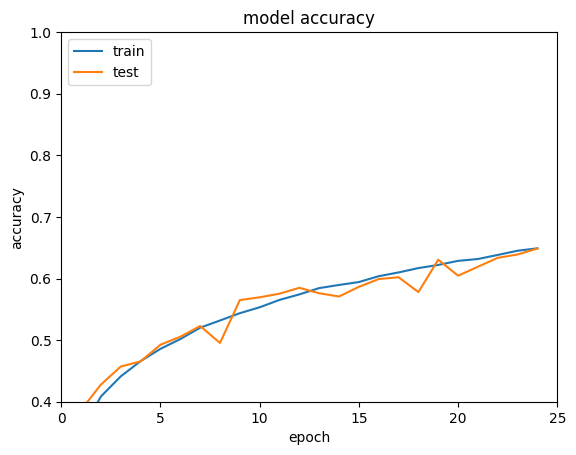

In [4]:
# Impostiamo la funzione di perdita come SparseCategoricalCrossentropy, adatta per
# problemi di classificazione multi-classe con etichette intere. NUM_EPOCHS è
# il numero di epoche di addestramento.
LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
NUM_EPOCHS = 25 # Puoi provare a modificare questo numero per ottenere una migliore accuratezza

# Compila il modello specificando l'ottimizzatore SGD (Stochastic Gradient Descent),
# la funzione di perdita e la metrica di accuratezza.
model.compile(optimizer='sgd',
              loss=LOSS,
              metrics=['accuracy'])

# La variabile history contiene i dati di addestramento e validazione per ogni epoca.
# Il modello viene addestrato secondo il numero di epoche previste utilizzando
# i dati di addestramento e convalidandoli su quelli di test.
history = model.fit(train_images, train_labels,epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# Plotta l'accuratezza del modello durante l'addestramento e la validazione per
# ogni epoca, impostando i limiti degli assi x (epoche) e y (accuratezza).
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()